# Principle Component Analysis - PCA 
---
PCA is a dimension reduction technique.  

step 1 : 均值归一化  
step 2 : 计算协方差矩阵（covariance matrix）$\Sigma = \frac{1}{m} \sum\limits_{i=1}^{n}(x^{(i)})(x^{(i)})^T = X^TX/m$  
step 3 : 计算协方差矩阵Σ的特征向量 (eigenvectors)  

可用奇异值分解（singular value decomposition）来求解

[U, S, V] = numpy.linalg.svd($\Sigma$)
http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(context="notebook", style="white")
sns.set(context="notebook", style="whitegrid", palette="dark")

import numpy as np
import pandas as pd
import scipy.io as sio

In [2]:
mat = sio.loadmat('ex7data1.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
data1 = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data1.head()

,X1,X2
0,3.381563,3.389113
1,4.527875,5.854178
2,2.655682,4.411995
3,2.765235,3.715414
4,2.846560,4.175506


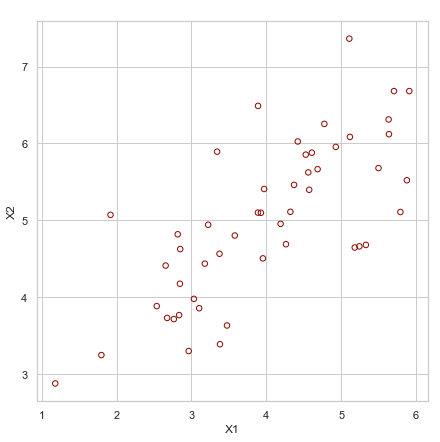

In [10]:
# Visualize the example dataset
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(data1.X1, data1.X2, color='', marker='o', edgecolors='r', s=30, label=" ")
#ax.legend(loc=2)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title(' ')
plt.show()

In [7]:
# Before running PCA, it is important to first normalize X
X_normalize = (data1 - data1.mean()) / data1.std()

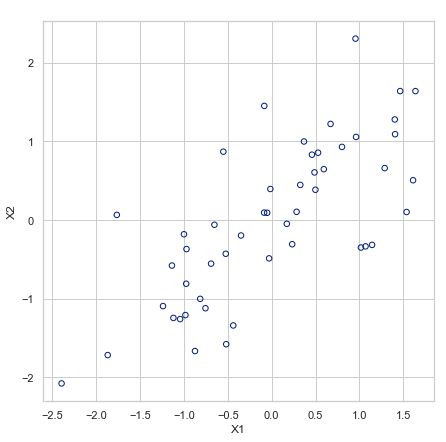

In [11]:
# Visualize the example dataset
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(X_normalize.X1, X_normalize.X2, color='', marker='o', edgecolors='b', s=30, label=" ")
#ax.legend(loc=2)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title(' ')
plt.show()

In [12]:
# Calculate covariance matrix (sigma)
# this is biased sample covariance matrix, 
# for unbiased version, you need to divide it by  𝑚−1
[m, n] = X_normalize.shape
Sigma = (X_normalize.T @ X_normalize) / m
Sigma

,X1,X2
X1,0.98000,0.72082
X2,0.72082,0.98000


In [13]:
# Run singular value decomposition
# We feed covariance matrix in SVD, 
# since the covariance matrix is symmetry left and right singular vector is the same, 
# which means U is V, so we could use either one to do dim reduction
[U,S,V] = np.linalg.svd(Sigma); U,S,V

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([1.70081977, 0.25918023]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

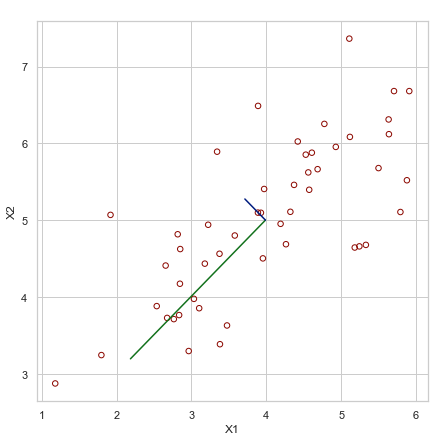

In [15]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(data1.X1, data1.X2, color='', marker='o', edgecolors='r', s=30, label=" ")

#ax.legend(loc=2)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title(' ')

# Draw the eigenvectors centered at mean of data. 
# These lines show the directions of maximum variations in the dataset.
mu = data1.mean()
t1_mu = mu + 1.5 * S[0] * U[:,0]
t2_mu = mu + 1.5 * S[1] * U[:,1]
ax.plot([mu[0], t1_mu[0]], [mu[1], t1_mu[1]], 'g')
ax.plot([mu[0], t2_mu[0]], [mu[1], t2_mu[1]], 'b')

plt.show()

# Project data to lower dimension

In [16]:
# if k > n: raise ValueError('k should be lower dimension of n')
# this value should be about 1.481274
k = 1
U_reduced = U[:,:k]
Z = np.dot(X_normalize, U_reduced); # same with @
Z[0:1,:] # show top 10 projected data

array([[1.48127391]])

http://stackoverflow.com/a/23973562/3943702

# Recover data to original dimension
---
Of course, there would be inevitable information loss if you boost data from lower to higher dimension

In [17]:
# this value should be about  -1.047419 -1.047419
X_recovered = np.dot(Z, U_reduced.T); X_recovered[0, :]

array([-1.04741883, -1.04741883])

In [18]:
np.sum(X_normalize - X_recovered)

X1   -4.726775e-14
X2    4.879430e-14
dtype: float64

In [19]:
np.sum(np.power((X_normalize - X_recovered), 2)) / np.sum(np.power(X_normalize, 2))

X1    0.132235
X2    0.132235
dtype: float64

# Dimension Reduction
---
You should now implement the projection step to map the data onto the first k eigenvectors. The code will then plot the data in this reduced dimensional space.  This will show you what the data looks like when using only the corresponding eigenvectors to reconstruct it.

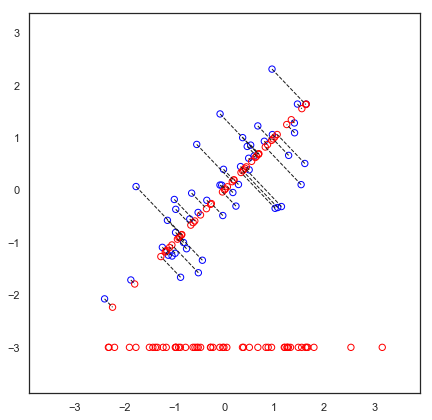

In [20]:
sns.set(context="notebook", style="white")

fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(X_normalize.X1, X_normalize.X2, color='', marker='o', edgecolors='blue', s=40, label=" ")
plt.scatter(X_recovered[:,0], X_recovered[:,1], color='', marker='o', edgecolors='red', s=40, label=" ")
plt.scatter(Z, (Z * 0 + 1) * -3 , color='', marker='o', edgecolors='red', s=40, label=" ")

for i in range(m): plt.plot([X_normalize.X1[i], X_recovered[i,0]], [X_normalize.X2[i], X_recovered[i,1]], '--k', linewidth=1.0);

# set the axis
plt.scatter(-3.5, -3.5 , color='', marker='o')
plt.scatter(-3, 3 , color='', marker='o')
plt.scatter(3.5, -3 , color='', marker='o')
plt.show()

# Loading and Visualizing Face Data 
---
We start the exercise by first loading and visualizing the dataset.
The following code will load the dataset into your environment

In [4]:
mat = sio.loadmat('ex7faces.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [5]:
X = np.array([x.reshape((32, 32)).T.reshape(1024) for x in mat.get('X')])
X.shape

(5000, 1024)

In [23]:
X_img = np.array([x.reshape((32, 32)).T for x in mat.get('X')])
X_img.shape

(5000, 32, 32)

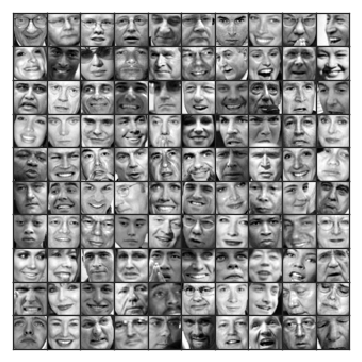

In [24]:
# Display the first 100 faces in the dataset
fig = plt.figure(num=1, figsize=(4.5,4.5))

for i in range(1, 101):
    ax = fig.add_subplot(10, 10, i)
    #ax.imshow(X_img[i-1,:,:], cmap='Greys_r')
    ax.imshow(X_img[i-1,:,:], cmap='gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
plt.tight_layout(-1)
plt.show()

# PCA on Face Data: Eigenfaces
---
Run PCA and visualize the eigenvectors which are in this case eigenfaces
We display the first 36 eigenfaces.

In [25]:
data2 = pd.DataFrame(X)
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-37.866314,-25.866314,-16.866314,-13.866314,22.133686,37.133686,40.133686,39.133686,43.133686,41.133686,...,4.133686,5.133686,-6.866314,-36.866314,-38.866314,-19.866314,48.133686,75.133686,31.133686,-99.866314
1,8.133686,17.133686,19.133686,19.133686,21.133686,28.133686,33.133686,34.133686,34.133686,35.133686,...,-62.866314,-65.866314,-73.866314,-76.866314,-75.866314,-62.866314,-48.866314,-34.866314,12.133686,0.133686
2,-32.866314,-6.866314,15.133686,30.133686,45.133686,55.133686,63.133686,68.133686,72.133686,74.133686,...,21.133686,19.133686,3.133686,-17.866314,-27.866314,-41.866314,-42.866314,-48.866314,-100.866314,-111.866314
3,-84.866314,-53.866314,-15.866314,1.133686,-1.866314,2.133686,11.133686,17.133686,22.133686,29.133686,...,-29.866314,-38.866314,-50.866314,-60.866314,-61.866314,-57.866314,-58.866314,-59.866314,-58.866314,-53.866314
4,2.133686,-0.866314,4.133686,12.133686,22.133686,20.133686,27.133686,33.133686,36.133686,34.133686,...,-58.866314,-72.866314,-80.866314,-82.866314,-81.866314,-79.866314,-73.866314,-42.866314,-1.866314,-14.866314


In [26]:
# Before running PCA, it is important to first normalize X
X_normalize = (data2 - data2.mean()) / data2.std()

In [27]:
# Calculate covariance matrix (sigma)
# this is biased sample covariance matrix, 
# for unbiased version, you need to divide it by  𝑚−1
[m, n] = X_normalize.shape
Sigma = (X_normalize.T @ X_normalize) / m
Sigma.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.999800,0.922049,0.780315,0.656765,0.574166,0.512132,0.468449,0.427555,0.396331,0.366356,...,0.016763,0.015927,0.009183,0.007120,0.000015,0.002340,0.000634,0.007317,0.016914,0.023420
1,0.922049,0.999800,0.925952,0.789746,0.689923,0.613532,0.561449,0.516349,0.482362,0.449228,...,0.031706,0.030096,0.024857,0.019853,0.006411,0.006004,0.004007,0.010026,0.020173,0.026295
2,0.780315,0.925952,0.999800,0.930361,0.819682,0.728698,0.668191,0.618162,0.579829,0.541531,...,0.054150,0.047398,0.039331,0.029938,0.012095,0.008550,0.006402,0.010157,0.017423,0.023991
3,0.656765,0.789746,0.930361,0.999800,0.943335,0.843126,0.773102,0.716751,0.674246,0.631810,...,0.079978,0.070400,0.057869,0.044179,0.023592,0.015970,0.010588,0.009176,0.010928,0.015816
4,0.574166,0.689923,0.819682,0.943335,0.999800,0.948654,0.876988,0.816322,0.768944,0.720027,...,0.112072,0.098618,0.081008,0.064265,0.043037,0.032742,0.022897,0.015327,0.011661,0.012095


In [28]:
# Run singular value decomposition
# We feed covariance matrix in SVD, 
# since the covariance matrix is symmetry left and right singular vector is the same, 
# which means U is V, so we could use either one to do dim reduction
[U,S,V] = np.linalg.svd(Sigma); U.shape

(1024, 1024)

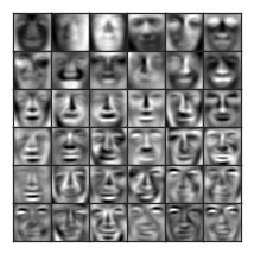

In [29]:
# Visualize the top 36 eigenvectors found
fig = plt.figure(num=1, figsize=(3,3))

for i in range(36):
    ax = fig.add_subplot(6, 6, i+1)
    ax.imshow(U[:,0:36].T[i].reshape((32,32)), cmap='gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
plt.tight_layout(-1)
plt.show()

# Dimension Reduction for Faces
---
Project images to the eigen space using the top k eigenvectors if you are applying a machine learning algorithm 

In [30]:
# Dimension reduction for face dataset.
K = 100
U_reduced = U[:,:K]
Z = np.dot(X_normalize, U_reduced); # same with @
Z.shape

(5000, 100)

# Visualization of Faces after PCA Dimension Reduction
---
Project images to the eigen space using the top K eigen vectors and visualize only using those K dimensions compare to the original input, which is also displayed

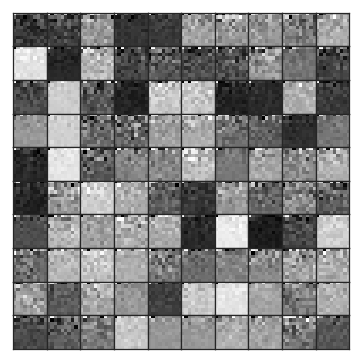

In [31]:
# Display the first 100 faces in the dataset
fig = plt.figure(num=1, figsize=(4.5,4.5))

for i in range(1, 101):
    ax = fig.add_subplot(10, 10, i)
    ax.imshow(Z[i-1].reshape((10,10)), cmap='gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
plt.tight_layout(-1)
plt.show()

In [32]:
# this value should be about  -1.047419 -1.047419
X_recovered = np.dot(Z, U_reduced.T); X_recovered[0, :]

array([-0.24048226, -0.31712217, -0.29928898, ...,  0.58083811,
        0.24940661,  0.00390519])

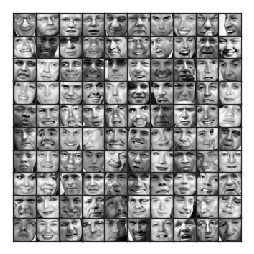

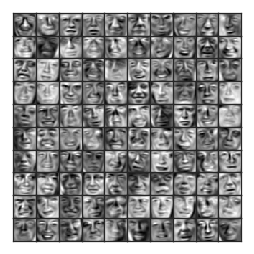

In [33]:
# Display the first 100 faces in the dataset
fig = plt.figure(num=1, figsize=(3,3))

for i in range(1, 101):
    ax1 = fig.add_subplot(10, 10, i)
    ax1.imshow(X_img[i-1,:,:], cmap='gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
plt.tight_layout(-1)

fig = plt.figure(num=2, figsize=(3,3))
for i in range(1, 101):
    ax2 = fig.add_subplot(10, 10, i)
    ax2.imshow(X_recovered[i-1,:].reshape((32,32)), cmap='gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
plt.tight_layout(-1)

plt.show()

#  Optional (ungraded) Exercise: PCA for Visualization  
---
One useful application of PCA is to use it to visualize high-dimensional data. In the last K-Means exercise you ran K-Means on 3-dimensional pixel colors of an image. We first visualize this output in 3D, and then apply PCA to obtain a visualization in 2D.

In [6]:
img = plt.imread('bird_small.png') # It's already divided by 255
# or
img = sio.loadmat('bird_small.mat')
img.keys()
img = img.get('A') / 255  # need to be divided by 255

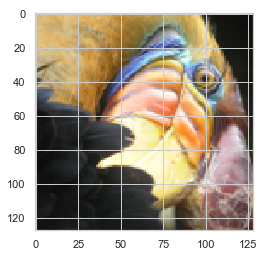

In [7]:
plt.imshow(img)

In [36]:
X = img.reshape((img.shape[0] * img.shape[1], 3))

In [37]:
def findClosestCentroids(X, centroids):
    [m, n] = X.shape
    K = centroids.shape[0]
    idx = np.zeros([m, 1])
    value = np.zeros([K, 1])
    
    for i in range(m):
        for j in range(K):
            value[j] = np.sum(np.power(X[i,:] - centroids[j,:], 2))
        idx[i] = np.argmin(value)
        
    return idx

In [38]:
def computeCentroids(X, idx, K):
    [m, n] = X.shape
    centroids = np.zeros([K, n]);
    for i in range(K):
        temp=np.where(idx==i)
        centroids[i,:]=np.sum(X[temp,:][0], 0) / X[temp,:][0].shape[0]
        
    return centroids

In [61]:
## Running K-Means clustering on example dataset.

[m, n] = X.shape
K = 16
epoch = 10
centroids =  X[np.random.randint(0, m, K), :]

idx = np.zeros([m, 1]);
# Run K-Means
for i in range(epoch):
    # For each example in X, assign it to the closest centroid
    idx = findClosestCentroids(X, centroids);

    # Given the memberships, compute new centroids
    centroids = computeCentroids(X, idx, K);

<IPython.core.display.Javascript object>


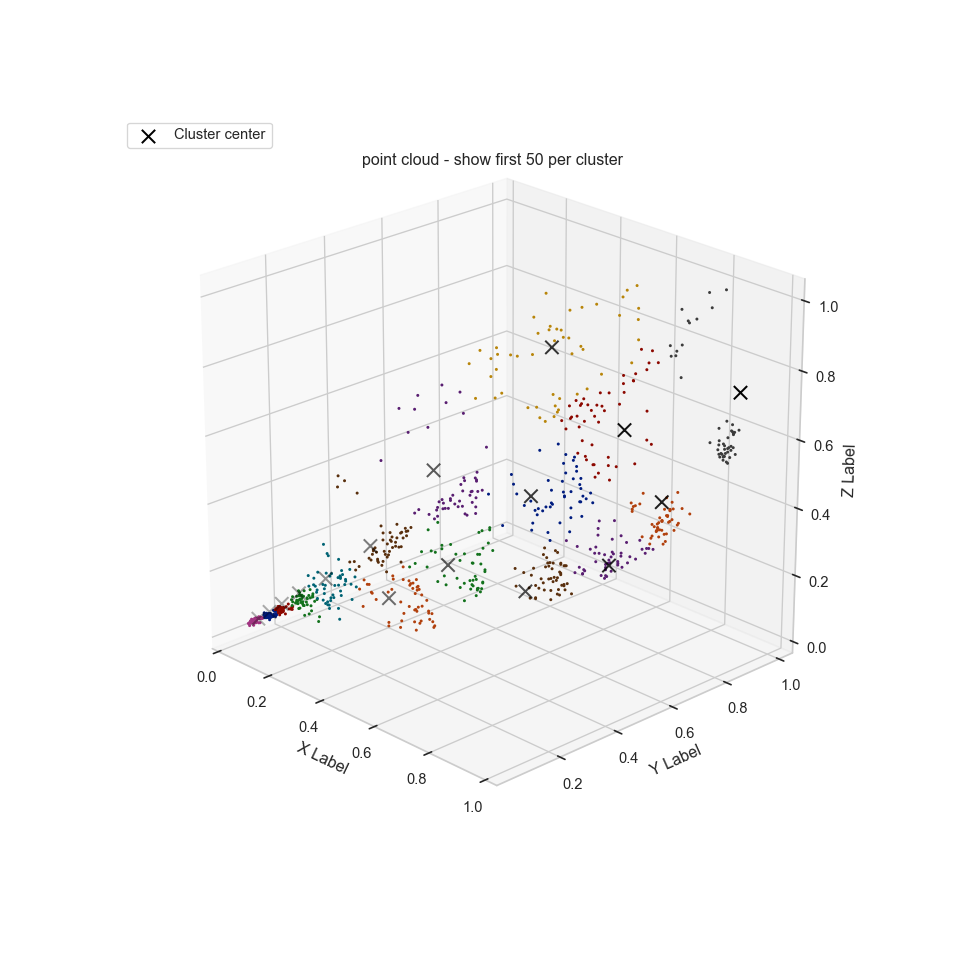

In [66]:
# Visualize data set by different cluster and cluster center
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

#fig, ax = plt.subplots(figsize=(8,8))
fig = plt.figure(dpi=80, figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
dis_count = 50

plt.title('point cloud - show first ' + str(dis_count) + ' per cluster')

for j in range(K):
    temp = np.where(idx==j)
    x = X[temp, :][0][0:dis_count, 0]
    y = X[temp, :][0][0:dis_count, 1]
    z = X[temp, :][0][0:dis_count, 2]
    #ax.scatter(x, y , marker='.', linewidths=0, s=15, cmap=plt.get_cmap('hsv'))
    ax.scatter(x, y ,z , marker='.', linewidth=0, alpha=1, cmap='spectral')
        
# Optionally, plot progress here
ax.scatter(centroids[:,0], centroids[:, 1], centroids[:, 2], marker='x', color='black', linewidths=10, s=100, label='Cluster center')
#for k in range(centroids.shape[0]):
#    ax.plot([centroids[k, 0],previous_centroids[k, 0]],[centroids[k, 1],previous_centroids[k, 1]], [centroids[k, 2],previous_centroids[k, 2]], color='black', linewidth=1)

#ax.axis('scaled') 
ax.legend(loc=2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# Optional (ungraded) Exercise: PCA for Visualization
# Use PCA to project this cloud to 2D for visualization

In [67]:
data3 = pd.DataFrame(X)
data3.head()

,0,1,2
0,0.858824,0.705882,0.403922
1,0.901961,0.725490,0.454902
2,0.886275,0.729412,0.431373
3,0.874510,0.725490,0.411765
4,0.882353,0.701961,0.403922


In [68]:
# Before running PCA, it is important to first normalize X
X_normalize = (data3 - data3.mean()) / data3.std()

In [69]:
# Calculate covariance matrix (sigma)
# this is biased sample covariance matrix, 
# for unbiased version, you need to divide it by  𝑚−1
[m, n] = X_normalize.shape
Sigma = (X_normalize.T @ X_normalize) / m
Sigma.head()

,0,1,2
0,0.999939,0.957451,0.768693
1,0.957451,0.999939,0.881103
2,0.768693,0.881103,0.999939


In [70]:
# Run singular value decomposition
# We feed covariance matrix in SVD, 
# since the covariance matrix is symmetry left and right singular vector is the same, 
# which means U is V, so we could use either one to do dim reduction
[U,S,V] = np.linalg.svd(Sigma); U.shape

(3, 3)

In [71]:
# Dimension reduction for face dataset.
U_reduced = U[:,:2]
Z = np.dot(X_normalize, U_reduced); # same with @
Z.shape

(16384, 2)

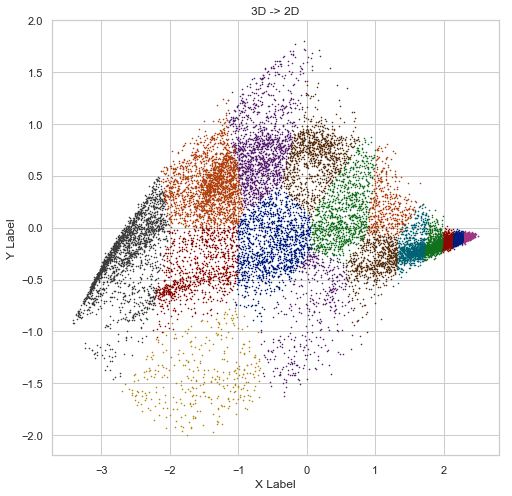

In [87]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8))

plt.title('3D -> 2D')

for j in range(K):
    temp = np.where(idx==j)
    x = Z[temp, :][0][:, 0]
    y = Z[temp, :][0][:, 1]
    ax.scatter(x, y, marker='.', linewidth=0, alpha=1, s= 10, cmap='spectral')
        
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.show()